In [ ]:
pip install hyppo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 1.1 MB/s eta 0:00:00


[array([0.73133895]), array([-0.44510948]), array([-0.21495388]), array([0.49616595]), array([-0.87523258]), array([-0.6636682]), array([0.92811948]), array([-0.60870735]), array([-0.54918922]), array([-0.52609557]), array([-1.06194586]), array([1.07444726]), array([1.06508264]), array([-0.93725036]), array([-0.6273342]), array([-0.62183638]), array([0.26598721]), array([-1.01753792]), array([0.75691101]), array([0.85243131]), array([1.0078498]), array([-0.96449054]), array([0.12275293]), array([1.0565664]), array([1.10914403]), array([0.96467122]), array([0.63006371]), array([0.95200939]), array([-0.15678903]), array([0.33489501]), array([-0.71246897]), array([0.37222155]), array([-0.36623323]), array([0.93279469]), array([0.83715607]), array([-0.93392292]), array([-0.6602013]), array([-0.75673659]), array([-0.25433952]), array([-0.83162334]), array([-0.4822226]), array([-0.96757033]), array([0.86224372]), array([-0.83519946]), array([0.63339619]), array([0.47085416]), array([0.966674

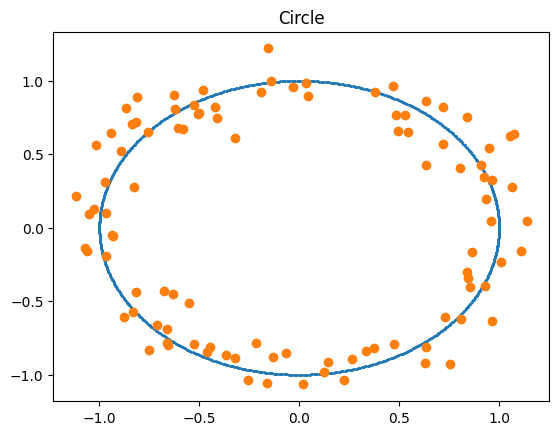

<ipython-input-5-20d528b2de80>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_1[j] = np.sin(X[j])+ ss.norm.rvs(0, 0.5, size = 1)
<ipython-input-5-20d528b2de80>:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_2[j] = np.sin(X[j])+ ss.norm.rvs(0, 0.5, size = 1)


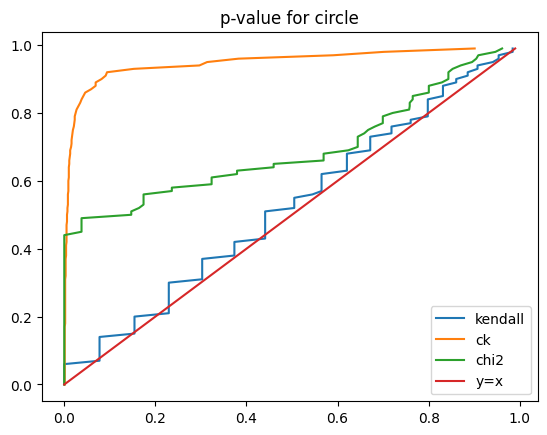

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy
import statistics as st
from hyppo.independence import Dcorr

n = 100
k = 2
#круг
def Nu(X_1, X_2):
  nu = [0]*k
  for i in range(k):
    nu[i] = [0]*k
  d1 = (max(X_1)-min(X_1))/k
  d2 = (max(X_2)-min(X_2))/k
  for i in range(z):
    for l in range(k):
      if(min(X_1)+l*d1<X_1[i] and X_1[i]<=min(X_1)+(l+1)*d1):
        for m in range(k):
          if(min(X_2)+m*d2<X_2[i] and X_2[i]<=min(X_2)+(m+1)*d2):
            nu[l][m]+=1
  return nu


t = np.linspace(0, 2*math.pi, 1000)
x_1 = np.sin(t)
x_2 = np.cos(t)
plt.title("Circle")
plt.scatter(x_1, x_2, s = 1)

X = np.random.uniform(0, 2*math.pi, n)
X_1 = []
X_2 = []
for i in range(len(X)):
  x_1 = np.sin(X[i])
  x_2 = np.cos(X[i])
  eps_1 = ss.norm.rvs(0, 0.1, size = 1)
  eps_2 = ss.norm.rvs(0, 0.1, size = 1)
  X_1.append(x_1+ eps_1)
  X_2.append(x_2+ eps_2)

print(X_1)
print(X_2)
plt.scatter(X_1, X_2)
plt.show()


z = 15
x_1 = np.array([float(0)]*z)
x_2 = np.array([float(0)]*z)
p_ken = []
p_ck1= []
p_chi = []

for i in range(n):
  X = np.random.uniform(0, 2*math.pi, z)
  for j in range(len(X)):
    X_1.append(np.sin(X[j])+ ss.norm.rvs(0, 0.5, size = 1))
    X_2.append(np.cos(X[j])+ ss.norm.rvs(0, 0.5, size = 1))
    x_1[j] = np.sin(X[j])+ ss.norm.rvs(0, 0.5, size = 1)
    x_2[j] = np.sin(X[j])+ ss.norm.rvs(0, 0.5, size = 1)
  res_ck = Dcorr().test(x_1, x_2)
  res_k = ss.kendalltau(X_1, X_2)
  p_ken.append(1-res_k.pvalue)
  p_ck1.append(res_ck.pvalue)
  #Nu(X_1, X_2)
  res_chi = ss.chi2_contingency(Nu(X_1, X_2))
  p_chi.append(1-res_chi.pvalue)
  X_1 = []
  X_2 = []
  x_1 = np.array([float(0)]*z)
  x_2 = np.array([float(0)]*z)
p_ken = np.sort(p_ken)
p_ck1 = np.sort(p_ck1)
p_chi = np.sort(p_chi)
ax = np.arange(0,1,1/n)
plt.title("p-value for circle")
plt.plot(p_ken, ax)
plt.plot(p_ck1, ax)
plt.plot(p_chi, ax)
plt.plot(ax, ax)
plt.legend (('kendall',"ck", "chi2", "y=x"))
plt.show()

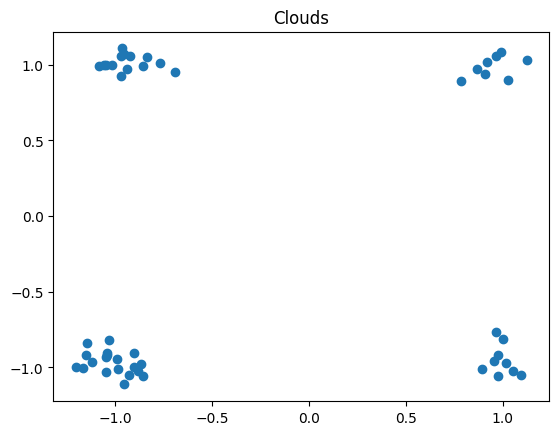

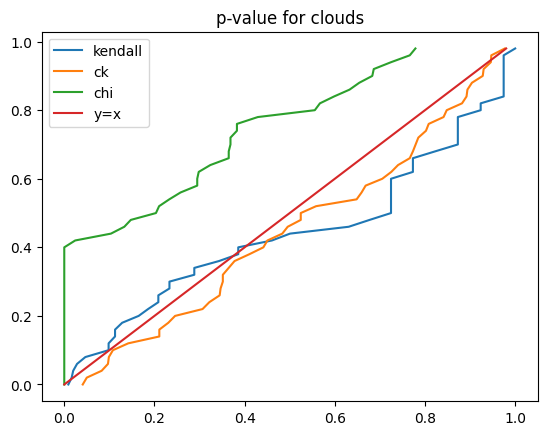

In [ ]:
#облака
n = 50
z = 20
X_1 = []
X_2 = []
x_1 = np.array([float(0)]*z)
x_2 = np.array([float(0)]*z)
sgm = 0.1
x = [-1, 1]
y = [-1, 1]
for i in range(n):
  o = np.random.randint(0, 4)
  if (o == 0):
    X_1.append(x[0]+ss.norm.rvs(0, sgm, size = 1))
    X_2.append(y[0]+ss.norm.rvs(0, sgm, size = 1))
  elif (o == 1):
    X_1.append(x[0]+ss.norm.rvs(0, sgm, size = 1))
    X_2.append(y[1]+ss.norm.rvs(0, sgm, size = 1))
  elif (o == 2):
    X_1.append(x[1]+ss.norm.rvs(0, sgm, size = 1))
    X_2.append(y[0]+ss.norm.rvs(0, sgm, size = 1))
  elif (o == 3):
    X_1.append(x[1]+ss.norm.rvs(0, sgm, size = 1))
    X_2.append(y[1]+ss.norm.rvs(0, sgm, size = 1))
plt.title("Clouds")
plt.scatter(X_1, X_2)
plt.show()

p_ken = []
p_ck = []
p_chi = []

for i in range(n):
  for j in range(z):
    o = np.random.randint(0, 4)
    if (o == 0):
      X_1.append(x[0]+ss.norm.rvs(0, sgm, size = 1))
      X_2.append(y[0]+ss.norm.rvs(0, sgm, size = 1))
      x_1[j] = x[0]+ss.norm.rvs(0, sgm)
      x_2[j] = y[0]+ss.norm.rvs(0, sgm)
    elif (o == 1):
      X_1.append(x[0]+ss.norm.rvs(0, sgm, size = 1))
      X_2.append(y[1]+ss.norm.rvs(0, sgm, size = 1))
      x_1[j] = x[0]+ss.norm.rvs(0, sgm)
      x_2[j] = y[1]+ss.norm.rvs(0, sgm)
    elif (o == 2):
      X_1.append(x[1]+ss.norm.rvs(0, sgm, size = 1))
      X_2.append(y[0]+ss.norm.rvs(0, sgm, size = 1))
      x_1[j] = x[1]+ss.norm.rvs(0, sgm)
      x_2[j] = y[0]+ss.norm.rvs(0, sgm)
    elif (o == 3):
      X_1.append(x[1]+ss.norm.rvs(0, sgm, size = 1))
      X_2.append(y[1]+ss.norm.rvs(0, sgm, size = 1))
      x_1[j] = x[1]+ss.norm.rvs(0, sgm)
      x_2[j] = y[1]+ss.norm.rvs(0, sgm)
  res_k = ss.kendalltau(X_1, X_2)
  res_ck = Dcorr().test(x_1, x_2)
  res_chi = ss.chi2_contingency(Nu(X_1, X_2))
  p_chi.append(1-res_chi.pvalue)
  p_ken.append(res_k.pvalue)
  p_ck.append(res_ck.pvalue)
  X_1 = []
  X_2 = []
  x_1 = np.array([float(0)]*z)
  x_2 = np.array([float(0)]*z)

p_chi = np.sort(p_chi)
p_ken = np.sort(p_ken)
p_ck = np.sort(p_ck)
ax = np.arange(0,1,1/n)
plt.title("p-value for clouds")
plt.plot(p_ken, ax)
plt.plot(p_ck, ax)
plt.plot(p_chi, ax)
plt.plot(ax, ax)
plt.legend (('kendall',"ck", "chi", "y=x"))
plt.show()

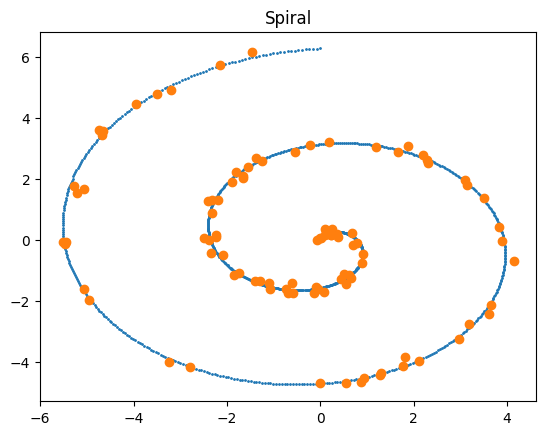

<ipython-input-280-cc664aa4d318>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_1[i]= X[i]*np.sin(2*X[i]) + ss.norm.rvs(0, 0.1, size = 1)
<ipython-input-280-cc664aa4d318>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_2[i]= X[i]*np.sin(2*X[i]) + ss.norm.rvs(0, 0.1, size = 1)


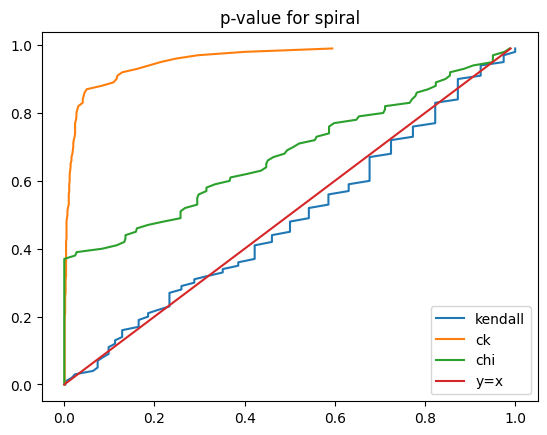

In [ ]:
#спираль
n = 100
z = 20
t = np.linspace(0, 2*math.pi, 1000)
x_1 = t*np.sin(2*t)
x_2 = t*np.cos(2*t)
plt.title("Spiral")
plt.scatter(x_1, x_2, s = 1)
X_1 = []
X_2 = []
X = np.random.uniform(0, 2*math.pi, n)
for i in range(len(X)):
  X_1.append(X[i]*np.sin(2*X[i])+ ss.norm.rvs(0, 0.1, size = 1))
  X_2.append(X[i]*np.cos(2*X[i])+ ss.norm.rvs(0, 0.1, size = 1))
plt.scatter(X_1, X_2)
plt.show()

x_1 = np.array([float(0)]*z)
x_2 = np.array([float(0)]*z)
p_ken = []
p_ck = []
p_chi = []
for j in range(n):
  X = np.random.uniform(0, 2*math.pi, n)
  for i in range(z):
    X_1.append(X[i]*np.sin(2*X[i])+ ss.norm.rvs(0, 0.1, size = 1))
    X_2.append(X[i]*np.cos(2*X[i])+ ss.norm.rvs(0, 0.1, size = 1))
    x_1[i]= X[i]*np.sin(2*X[i]) + ss.norm.rvs(0, 0.1, size = 1)
    x_2[i]= X[i]*np.sin(2*X[i]) + ss.norm.rvs(0, 0.1, size = 1)
  res_k = ss.kendalltau(X_1, X_2)
  res_ck = Dcorr().test(x_1, x_2)
  res_chi = ss.chi2_contingency(Nu(X_1, X_2))
  p_ken.append(res_k.pvalue)
  p_ck.append(res_ck.pvalue)
  p_chi.append(1-res_chi.pvalue)
  X_1 = []
  X_2 = []
  x_1 = np.array([float(0)]*z)
  x_2 = np.array([float(0)]*z)
p_ken = np.sort(p_ken)
p_ck = np.sort(p_ck)
p_chi = np.sort(p_chi)
plt.title("p-value for spiral")
ax = np.arange(0,1,1/n)
plt.plot(p_ken, ax)
plt.plot(p_ck1, ax)
plt.plot(p_chi, ax)
plt.plot(ax, ax)
plt.legend (('kendall',"ck", "chi", "y=x"))
plt.show()

In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
#1#
import pandas as pd
import numpy as np
import pingouin as pg

data = pd.read_csv("/content/dataset.csv")
#corr
print("Corr")
print(pg.pairwise_corr(data, columns=['Оценка.1']).r)
print(pg.pairwise_corr(data, columns=['Оценка.2']).r)
print(pg.pairwise_corr(data, columns=['Оценка.3']).r)
print(pg.pairwise_corr(data, columns=['Оценка.4']).r)
#corr partial
print("Partial")
print(pg.pairwise_corr(data, columns=['Оценка.1'], covar = ['Оценка.2']).r)
print(pg.pairwise_corr(data, columns=['Оценка.1'], covar = ['Оценка.3']).r)
print(pg.pairwise_corr(data, columns=['Оценка.1'], covar = ['Оценка.4']).r)
print(pg.pairwise_corr(data, columns=['Оценка.2'], covar = ['Оценка.3']).r)
print(pg.pairwise_corr(data, columns=['Оценка.2'], covar = ['Оценка.4']).r)

Corr
0    0.511660
1    0.432463
2    0.123863
Name: r, dtype: float64
0    0.511660
1    0.436564
2    0.218213
Name: r, dtype: float64
0    0.432463
1    0.436564
2    0.254438
Name: r, dtype: float64
0    0.123863
1    0.218213
2    0.254438
Name: r, dtype: float64
Partial
0    0.270561
1    0.009765
Name: r, dtype: float64
0    0.398050
1    0.015521
Name: r, dtype: float64
0    0.500366
1    0.417799
Name: r, dtype: float64
0    0.398050
1    0.127329
Name: r, dtype: float64
0    0.500366
1    0.403096
Name: r, dtype: float64


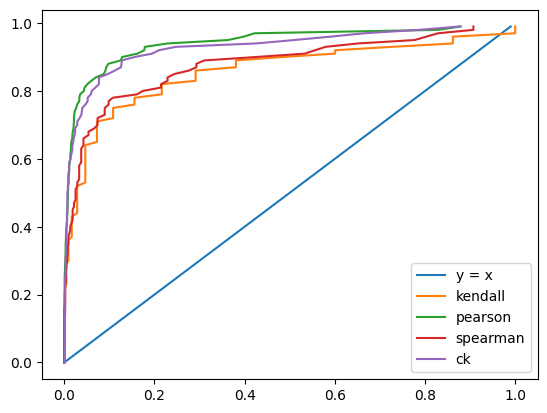

In [ ]:
#3(1)#
n = 100
k = 10
X = []
Y = []
x_1 = np.array([float(0)]*k)
y_1 = np.array([float(0)]*k)
kend = []
pears = []
spear = []
ck = []
for i in range(n):
  for j in range(k):
    x = np.random.uniform(-1, 2)
    eps = ss.norm.rvs(0, 0.5)
    X.append(x)
    Y.append(x**2 + eps)
    x_1[j] = x
    y_1[j] = x**2 + eps
  res_kend = ss.kendalltau(X, Y)
  res_pears = ss.pearsonr(X, Y)
  res_spear = ss.spearmanr(X, Y)
  res_ck = Dcorr().test(x_1, y_1)
  pears.append(res_pears.pvalue)
  spear.append(res_spear.pvalue)
  kend.append(res_kend.pvalue)
  ck.append(res_ck.pvalue)
  X = []
  Y = []
  x_1 = np.array([float(0)]*k)
  y_1 = np.array([float(0)]*k)
kend = np.sort(kend)
pears = np.sort(pears)
spear = np.sort(spear)
ck = np.sort(ck)
ax = np.arange(0,1,1/n)
plt.plot(ax, ax)
plt.plot(kend, ax)
plt.plot(pears, ax)
plt.plot(spear, ax)
plt.plot(ck, ax)
plt.legend (('y = x', 'kendall', 'pearson', 'spearman', 'ck'))
smrm = pears

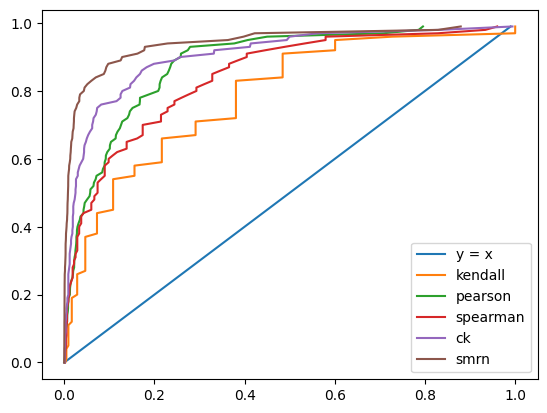

In [ ]:
#3(2)#
n = 100
k = 10
X = []
Y = []
x_2 = np.array([float(0)]*k)
y_2 = np.array([float(0)]*k)
kend = []
pears = []
spear = []
ck = []
for i in range(n):
  for j in range(k):
    x = np.random.uniform(0, 2*math.pi)
    eps = ss.norm.rvs(0, 0.5)
    X.append(x)
    Y.append(math.sin(x) + eps)
    x_2[j] = x
    y_2[j] = math.sin(x) + eps
  res_ck = Dcorr().test(x_2, y_2)
  res_kend = ss.kendalltau(X, Y)
  res_pears = ss.pearsonr(X, Y)
  res_spear = ss.spearmanr(X, Y)
  pears.append(res_pears.pvalue)
  spear.append(res_spear.pvalue)
  kend.append(res_kend.pvalue)
  ck.append(res_ck.pvalue)
  X = []
  Y = []
  x_2 = np.array([float(0)]*k)
  y_2 = np.array([float(0)]*k)
kend = np.sort(kend)
pears = np.sort(pears)
spear = np.sort(spear)
ck = np.sort(ck)
ax = np.arange(0,1,1/n)
plt.plot(ax, ax)
plt.plot(kend, ax)
plt.plot(pears, ax)
plt.plot(spear, ax)
plt.plot(ck, ax)
plt.plot(smrm, ax)
plt.legend (('y = x', 'kendall', 'pearson', 'spearman', 'ck', 'smrn'))